In [255]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 15.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib as plt


In [2]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [4]:
df = pd.read_csv('327164_2024_08_27.csv')
df

,title,is_spam
0,i am neet 2024 aspirant \nbelow post card I up...,0
1,What is the syllabus for IIT Jam Biotechnology?,0
2,also please answer the same for my eligibility...,0
3,What is RPI ranked in its country?,0
4,What are the durations of the courses offered ...,0
...,...,...
112301,How to complain against Navi...,1
112302,How to complain against Navi? 7735251281,1
112303,How to raise a complaint in DMart? us 79824=76970,1
112304,How do I raise a complaint against JioMart? us...,1


In [5]:
df.shape

(112306, 2)

In [6]:
df.isnull().sum()

title      19
is_spam     0
dtype: int64

In [7]:
df[df['title'].isnull()]

,title,is_spam
88308,NaN,1
88309,NaN,1
88310,NaN,1
88311,NaN,1
88312,NaN,1
88313,NaN,1
88314,NaN,1
88315,NaN,1
88316,NaN,1
88317,NaN,1


In [8]:
df = df.dropna(axis=0)
df = df.drop_duplicates()

In [9]:
df.shape

(105417, 2)

In [10]:
df['title'] = df['title'].apply(lambda x:remove_html_tags(x))

In [11]:
df.isnull().sum()

title      0
is_spam    0
dtype: int64

In [12]:
df.is_spam.value_counts()

is_spam
0    64599
1    40818
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105417 entries, 0 to 112305
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    105417 non-null  object
 1   is_spam  105417 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [14]:
newdf = pd.read_csv("new_pattern.csv")
newdf = newdf[["title", "is_spam"]]
newdf["is_spam"].value_counts()

is_spam
0    109
1     90
Name: count, dtype: int64

In [15]:
df = pd.concat([df, newdf], axis=0, ignore_index=True)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104483 entries, 0 to 105615
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    104483 non-null  object
 1   is_spam  104483 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [57]:
x = df[['title']]
y = df['is_spam']

In [58]:
ros = RandomOverSampler()
# ros = RandomUnderSampler()
ros_x, ros_y = ros.fit_resample(x, y)


# ros_x = x
# ros_y = y

In [59]:
cv = CountVectorizer()
# cv = TfidfVectorizer()
ros_x = cv.fit_transform(ros_x['title'])
xtrain, xtest, ytrain, ytest = train_test_split(ros_x, ros_y, 
                                                test_size=0.25, 
                                                random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)
print(model.score(xtrain, ytrain))
print(model.score(xtest, ytest))

1.0
0.9993712471313151


In [60]:

cf = confusion_matrix(ytest, model.predict(xtest))
cf

array([[16033,     5],
       [   15, 15756]])

<Axes: >

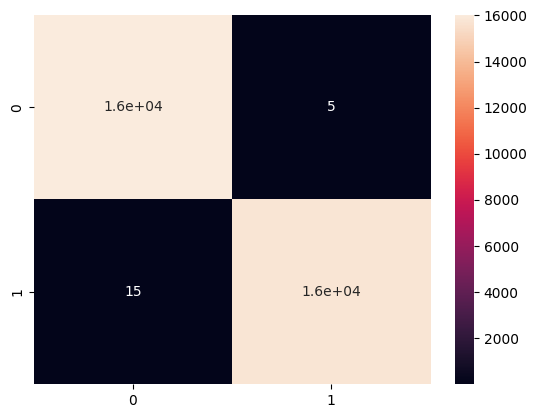

In [61]:
sns.heatmap(cf, annot=True) 
# plt.show()

In [62]:
sample = "how to apply sponsorship before attempting IMUCET"
data = cv.transform([sample]).toarray()
print(model.predict(data))

[0]


In [64]:
counter = 0
is_spams = list(newdf['is_spam'].values)
for ind, item in enumerate(list(newdf['title'].values)):
    data = cv.transform([item]).toarray()
    if str(model.predict(data)[0]) != str(is_spams[ind]):
        print(item, is_spams[ind], str(model.predict(data)[0]))
        counter+=1
print(counter)

How much fees of bsc non medical per year 0 1
How can I apply to MZCET? 0 1
How much ragging culture? And education and hostel quality? 0 1
How could I download the certificate? 0 1
4


In [53]:
newdf = pd.read_csv("new_pattern.csv")
newdf = newdf[["title", "is_spam"]]
newdf

,title,is_spam
0,how to apply sponsorship before attempting IMU...,0
1,"""How do I complain on Swiggy? 690,,9878,,896""",1
2,How many seats are vacant in lucknow for gover...,0
3,How many seats are vacant in lucknow for gover...,0
4,how many government law college in Chennai,0
...,...,...
194,"""How can I get in touch with Myntra executiv",1
195,"Toll Free: Online complain, 24/7),08252-301600...",1
196,How do I stop auto payment on Kuku FM?,1
197,how can I prepare for gate within 6 months,0


In [54]:
x = newdf[['title']]
y = newdf['is_spam']

In [55]:
x = cv.transform(x["title"])
model.score(x, y)*100

94.47236180904522

<Axes: >

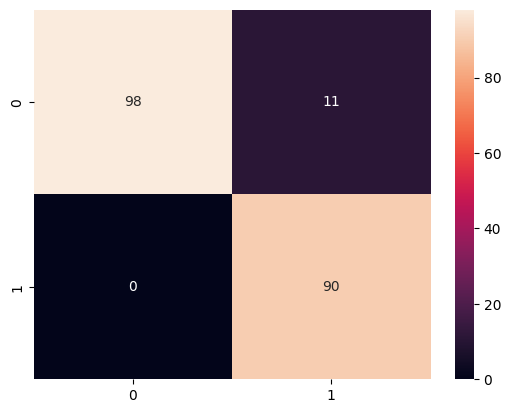

In [56]:
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True)

In [42]:
confusion_matrix(y, model.predict(x))

array([[104,   5],
       [  0,  90]])

In [43]:
data = pd.DataFrame({
    "x":x,
    "y actual": y,
    "y predicted":model.predict(x)
})

data

,x,y actual,y predicted
0,<Compressed Sparse Row sparse matrix of dtype ...,0,0
1,<Compressed Sparse Row sparse matrix of dtype ...,1,1
2,<Compressed Sparse Row sparse matrix of dtype ...,0,0
3,<Compressed Sparse Row sparse matrix of dtype ...,0,0
4,<Compressed Sparse Row sparse matrix of dtype ...,0,0
...,...,...,...
194,<Compressed Sparse Row sparse matrix of dtype ...,1,1
195,<Compressed Sparse Row sparse matrix of dtype ...,1,1
196,<Compressed Sparse Row sparse matrix of dtype ...,1,1
197,<Compressed Sparse Row sparse matrix of dtype ...,0,1
